In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from svm_margin_plot import plot_svm_boundary
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Support Vector Machines

It is one of the  mmore complex algorithms in this course. It comes wiith the simple premise:
> Does a hyperplane exist that can effectively separate classes?

## Theory and Intuition
First coined in _Generalized Portrait Algorithm_ by Alexey Chervonenkis and Vladimir Vapnik in 1963. I took reasearch up until the 1990s to develop what we today use as vector machines

### Hyper Planes
In an $N$ dimensional space, a hyperplane is a flat subspace of the hyperplane with dimension $N-1$.

Examples:
> - 1D Hyperplane is a single point
> - 2D Hyperplane is a line
> - 3D Hyperplane is a flat plane

The main idea between SVM is that we can use hyperplanes to create a separation between classes. Then new points will fall on either side of this hyperplane, which we can use to assign a class.

__Mathematic Definition for a Hyperplane__

$$
\beta_0 + \beta_1X_1 + ... + \beta_pX_P
$$

### Margins

Once we have the data, we can separate it and we might end up with multiple hyperplanes which separate our classes, but we need to choose the best separator. For this we could choose a separator which maximizes the margins between our classes, this is known as __Maximal Margin Classifier__.

Now, we can have missclassification, and for this we will have a bias-variance trade-off depending on where we place the separator.

The distance between threshold andd the observations are known as a __soft margin__, they allow for missclassification inside of the margin. Now with this we are able to choose what is the acceptable rate of missclassification.For this we can use cross validation to determine the optiimal size of the margins

### Kernels
They allow us to move beyond _Support  Vector Classifier_ and use _Support Vector Machines_. It takes our $N$ dimensional data, and projects it to a higher dimension that could allow us to separate our data with a hyperplane.

> __Kernel trick__:
> It is used to avoid the recomputing of points in a higher dimension..
> It works by taking the dot products of the transpositions of the data.


# Python code

Lets first open our data and plot it out. Here we can see a clear demarcation between our two classes.

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

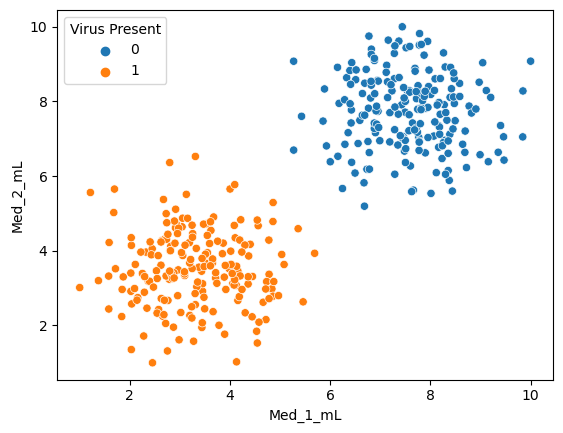

In [35]:
df = pd.read_csv('../DATA/mouse_viral_study.csv')

sns.scatterplot(data=df,x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

Now lets manually create a hyperplane separatiing our data.

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

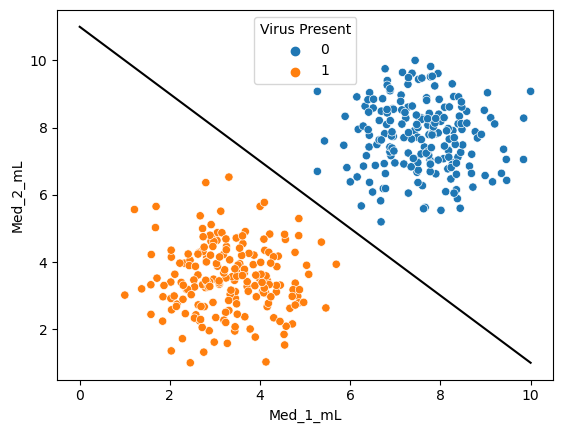

In [36]:
x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x +b
plt.plot(x,y,'black')

sns.scatterplot(data=df,x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

Let's now use a SVC to analyze our data.

Using _help()_ we can see that there are multiple kernels available for us to use.

## Linear Kernel

For this example we are going to use the _linear_ kernel and a $C$ parameter of 1000. Then we  will use the included package to plot our results. 

Our parameter $C$ is the amount of how many points we are allowing to be within our margin. Within Scikit-Learn this parameter is inversely proportional to our results, meaning that a lower $C$ value will give us more points within our margins.

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


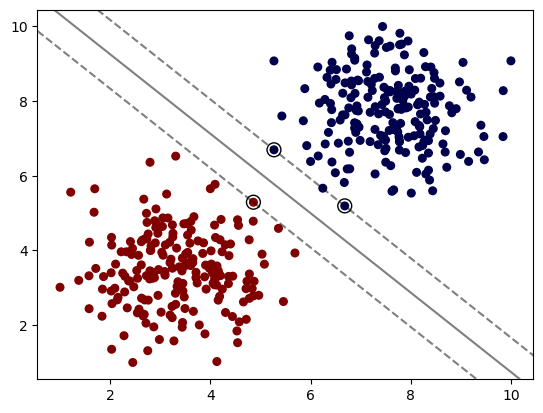

In [37]:
X = df.drop('Virus Present',axis=1)
y = df['Virus Present']

model = SVC(kernel='linear', C=1000)

model.fit(X,y)

plot_svm_boundary(model,X,y)

Let's try the same using a lower $C$ parameter. Here we can see that we have a lot more points within the margin. We need to perform cross validation to determine the correct value for $C$.

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


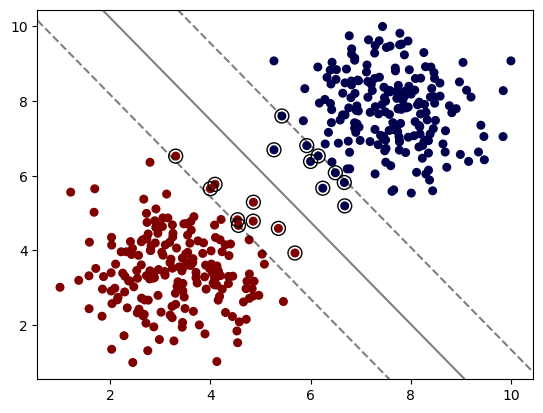

In [38]:
model = SVC(kernel='linear', C=0.05)

model.fit(X,y)

plot_svm_boundary(model,X,y)

## Radial Basis Function Kernel

### 'Scale' gamma parameter

Now let's experiment with another kernel. We are going to use the default kernel which is __rbf__ which is the radial basis function.

Here we can see that we obtain a curve as our demarcation hyperplane, and our margins surrounds our data points.

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


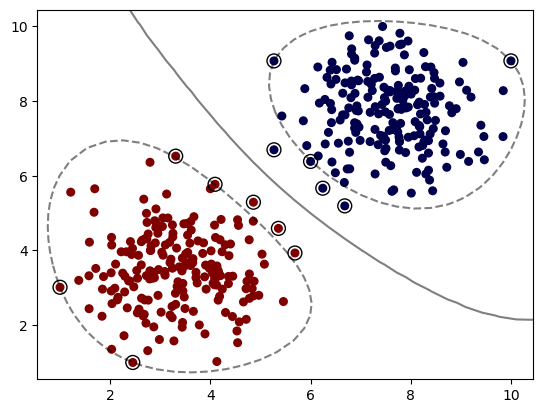

In [39]:
model = SVC(kernel='rbf', C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

Let's now see what our $\gamma$ parameter. We have three options:

$$
Scale = \frac{1}{n_{features}\times X_{variety}}
$$

$$
Auto = \frac{1}{n_{features}}
$$

$float = $ a range of floating point numbers for cross validation.

Take into consideration that __Scale__ is the default value for the SVC.

The higher our $\gamma$ the more we fit to our data, but we have to remember that we can over-fit our data

### 'Auto' gamma parameter

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


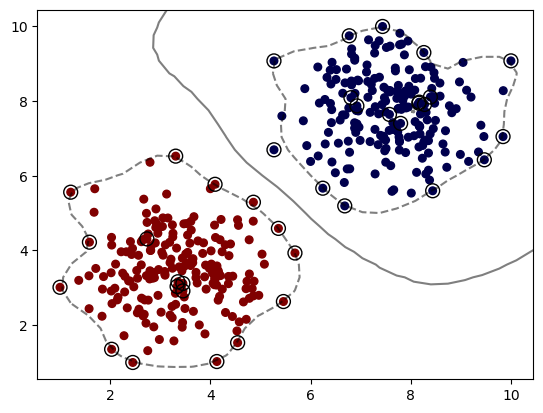

In [40]:
model = SVC(kernel='rbf', C=1, gamma= 'auto')
model.fit(X,y)
plot_svm_boundary(model,X,y)

## Sigmoid Kernel

Testing the  __Sigmoid__ kernel, we can see that all of our data is within the margins. For this case this will give us a wrong result so we shouldn't use it.

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


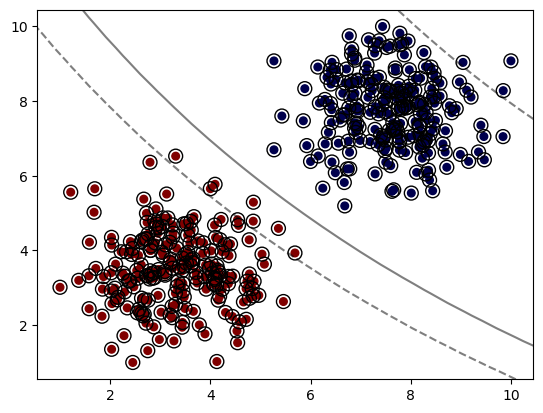

In [41]:
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

## Polynomial Kernel

Now testing the __polynomial__ kernel.

Setting our degree value as $1$, we get the same results as our linear model.

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


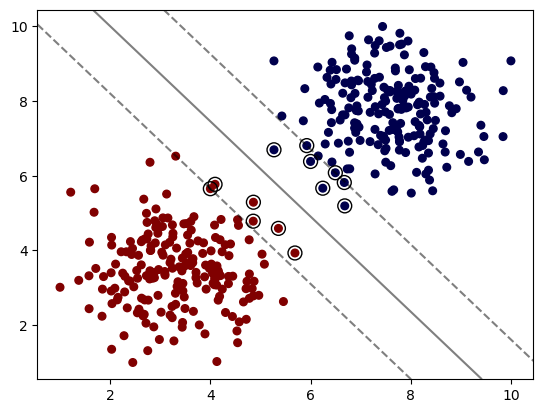

In [42]:
model = SVC(kernel='poly', C=1, degree=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

We can see that for higher degrees we start to get a curve in our model. For this case we can see little curving as a line separates our model perfectly.

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


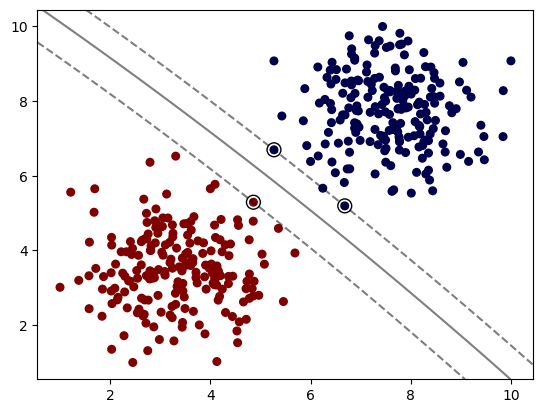

In [43]:
model = SVC(kernel='poly', C=1, degree=3)
model.fit(X,y)
plot_svm_boundary(model,X,y)

## Grid Search

We will perform a gridsearch from our model to cross validate our results.

We can see that for this model our best parammeters where $C = 0.01$ and a Linear Kernel.

In [45]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1], 'kernel':['linear','rbf']}

grid = GridSearchCV(svm,param_grid)

grid.fit(X,y)

grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

## Regression Tasks